In [2]:
import os
import pandas as pd

In [16]:
filePath = os.path.join(os.getcwd(), 'hindi_corpus_2012_12_19', 'Hi_Newspapers.txt')
data = pd.read_csv(filePath, delimiter='\t', names=['source', 'date', 'unnamed_1', 'unnamed_2', 'text'])

In [17]:
filePath2 = os.path.join(os.getcwd(), 'hindi_corpus_2012_12_19', 'Hi_Blogs.txt')
data2 = pd.read_csv(filePath2, delimiter='\t', names=['source', 'date', 'unnamed_1', 'unnamed_2', 'text'])

In [18]:
data.loc[:,['source', 'date', 'text']]

,source,date,text
0,jansatta.com,2012/12/08,पूर्व पाकिस्तानी कप्तान अकरम ने कहा कि यदि खिल...
1,indiatimes.com,2012/03/21,- मार्केट में एक्सफोलिएटिंग लिप स्क्रब आसानी स...
2,jagran.com,2012/07/07,पूर्वी कैनाल मार्ग-
3,bhaskar.com,2012/11/02,संपत्ति लंबे समय में बनाई जाती है और इस काम को...
4,indiatimes.com,2012/05/13,-amazon.com के किंडल ई-रीडर्स पर अब हैरी पॉटर ...
...,...,...,...
114752,jagran.com,2012/10/31,मियादाद ने एक पाक चैनल से कहा कि वह नवाज को चे...
114753,ranchiexpress.com,2012/11/26,मामला घरेलू विवाद का ः एसपी इस संबंध में कोडरम...
114754,punjabkesari.in,2012/03/22,स. बेअंत ङ्क्षसह के दरवाजे 24 घंटे खुले रहते थ...
114755,bhaskar.com,2012/04/21,ॐ ब्रभवे नम:


In [5]:
data2.loc[:,['source', 'date', 'text']]

,source,date,text
0,shrut-sugya.blogspot.com,2012/09/01,एक नगर का सेठ अपार धन सम्पदा का स्वामी था। एक ...
1,meraapnajahaan.blogspot.com,2012/11/17,घड़ी दो के टनटनाने की आवाज़ कर रही थी और संजय ...
2,rajneesh-tiwari.blogspot.com,2012/01/22,तस्वीर वही और बात वही है
3,kumarshivnath.blogspot.com,2012/05/30,'बेबसी' मुस्कुराती है
4,raviratlami.blogspot.com,2012/01/01,112
...,...,...,...
216417,tracingsilverlines.blogspot.com,2012/01/01,मन में चाह है अगर
216418,bikhareakshar.blogspot.com,2012/10/01,"लहर चले जब उसके तन की,"
216419,ekprayas-vandana.blogspot.com,2012/09/01,ओ तुलसी ! तुम कितनी कोमल हो
216420,kabaadkhaana.blogspot.com,2012/09/01,हाँ गाहे गाहे दीद के दौलत हाथ आए


In [19]:
data3.loc[:,['source', 'date', 'text']]

NameError: name 'data3' is not defined

In [20]:
sample = data.text.loc[1]

In [21]:
sample.strip()

'- मार्केट में एक्सफोलिएटिंग लिप स्क्रब आसानी से मिल जाएंगे। नहीं, तो आप बच्चों के मुलायम ब्रिसल वाले ब्रश को गोलाई में घुमाते हुए स्क्रब करें।'

In [22]:
from textGenerator import TextProcess
textProcessor = TextProcess()

In [11]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

In [12]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    # rem_num = re.sub('[0-9]+', '', rem_url)
    # tokenizer = RegexpTokenizer(r'\w+')
    # tokens = tokenizer.tokenize(rem_num)  
    # filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    # stem_words=[stemmer.stem(w) for w in filtered_words]
    # lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    # return " ".join(filtered_words)
    return rem_url

In [13]:
preprocess(sample)

'- मार्केट में एक्सफोलिएटिंग लिप स्क्रब आसानी से मिल जाएंगे। नहीं, तो आप बच्चों के मुलायम ब्रिसल वाले ब्रश को गोलाई में घुमाते हुए स्क्रब करें।'

In [23]:
from textGenerator import TextGenerator
textgen = TextGenerator()
sample = textgen.getRandomText()
# preprocess(sample)
sample

'* 15 अगस्त 2011 को अन्ना हजारे के नेतृत्व में जनलोकपाल बिल के लिए दिल्ली में जंतर-मंतर पर अनश्चितकालीन भूख हड़ताल शुरू की.'

In [24]:
temp = sample


In [26]:
sample = temp
preprocess(sample)
# print(f"Sample : {sample}")
sample = sample.strip()
# print(f"Sample : {sample}")
sample = sample.splitlines()
print(f"Sample : {sample}")
sample = sample[0]
sample = sample.split()
print(f"Sample : {sample}")
# word = sample[-5]
# print(f"Word : {word}")

NameError: name 'preprocess' is not defined

In [27]:
def isEndOfLine(x):
    if u'\u0964' <= x <= u'\u0965' :
        return True
    return False
    

def isMatra(x):
    if (u'\u0901' <= x <= u'\u0903' or 
        u'\u093C' <= x <= u'\u094F' or
        u'\u0951' <= x <= u'\u0954' or
        u'\u0951' <= x <= u'\u0954' or
        u'\u0962' <= x <= u'\u0963'):
        return True
    return False
def isVowel(x):
    if (u'\u0905' <= x <= u'\u0914' or 
        u'\u0960' <= x <= u'\u0961'):
        return True
    return False
def isConsonant(x):
    if (u'\u0915' <= x <= u'\u0939' or 
        u'\u0958' <= x <= u'\u095F'):
        return True
    return False

def isOM(x):
    if x == u'\u0950' :
        return True
    return False
    
    

In [28]:
pd1 =data.text
pd2 =data2.text
new_sample = pd.concat([pd1, pd2], ignore_index=True)

new_sample.head()


0    पूर्व पाकिस्तानी कप्तान अकरम ने कहा कि यदि खिल...
1    - मार्केट में एक्सफोलिएटिंग लिप स्क्रब आसानी स...
2                                  पूर्वी कैनाल मार्ग-
3    संपत्ति लंबे समय में बनाई जाती है और इस काम को...
4    -amazon.com के किंडल ई-रीडर्स पर अब हैरी पॉटर ...
Name: text, dtype: object

In [29]:
vowel=0
consonant=0
matra=0
eofLine=0
OM=0
vowel_matra=0
half_vowel=0
consonant_matra=0
constant_half_matra=0;
word_start_matra=0
half_consonant_vowel=0
half_consonant_matra=0
dictionary_vowel = {}
dictionary_consonant = {} 
words_with_half_consonant_following_vowel={}
words_with_half_consonant_following_matra={}
words_with_vowels_following_matra={}
constant_and_vowel_combination={}
words_starting_with_matra = []
words_having_half_vowel=[]

wordCount = 0
for para in new_sample:
    words = para.split()
    for word in words:
        characters = list(word)
        wordCount += 1
#         if(isMatra(characters[0])):
#             word_start_matra+=1
        for index, char in enumerate(characters):
            if(isMatra(char)):
                matra = matra+1
                if(index==0):
                    word_start_matra += 1
                    words_starting_with_matra.append(word)
                
            elif(isVowel(char)):
                if(index+1 < len(characters)):
                    if(isMatra(characters[index+1])):
                        vowel_matra=vowel_matra+1
                        if word in words_with_vowels_following_matra: 
                            words_with_vowels_following_matra[word] += 1
                        else: 
                            words_with_vowels_following_matra.update({word: 1}) 
                        
                    if(characters[index+1] == u'\u094D'):
                        half_vowel+=1
                        words_having_half_vowel.append(word)
                if char in dictionary_vowel: 
                    dictionary_vowel[char] += 1
                else: 
                    dictionary_vowel.update({char: 1}) 
                vowel=vowel+1
            elif(isConsonant(char)):
                if(index+1 < len(characters)):
                    if(isMatra(characters[index+1])):
                        consonant_matra=consonant_matra+1
                    if(index+2 < len(characters)):   
                        if(characters[index+1] == u'\u094D'):
                            if(isVowel(characters[index+2])):
                                half_consonant_vowel+=1
                                if word in words_with_half_consonant_following_vowel: 
                                    words_with_half_consonant_following_vowel[word] += 1
                                else: 
                                    words_with_half_consonant_following_vowel.update({word: 1}) 
                            if(isMatra(characters[index+2])):
                                half_consonant_matra+=1
                                if word in words_with_half_consonant_following_matra: 
                                    words_with_half_consonant_following_matra[word] += 1
                                else: 
                                    words_with_half_consonant_following_matra.update({word: 1})
                if char in dictionary_consonant: 
                    dictionary_consonant[char] += 1
                else: 
                    dictionary_consonant.update({char: 1}) 
                
                consonant = consonant+1
            elif(isEndOfLine(char)):
                eofLine = eofLine+1
            elif(isOM(char)):
                OM = OM+1

In [207]:
print(f"Matra : {matra}")
print(f"Vowel : {vowel}")
print(f"Consonant : {consonant}")
print(f"end of line : {eofLine}")
print(f"OM : {OM}")
print(f"Word starting with a Matra : {word_start_matra}")
print(f"Vowels followed by a matra : {vowel_matra}")
print(f"Consonant followed by a matra : {consonant_matra}")
print(f"half vowel : {half_vowel}")
print(f"Number of words : {wordCount}")
print(f"half cononants followed by a matra : {half_consonant_matra}")
print(f"half cononants followed by a Vowel: {half_consonant_vowel}")
print(f"Words having half vowel: {words_having_half_vowel}")
print(f"Words starting with a matra : {words_starting_with_matra}")
print(f"Words with vowels followed by a matra : {words_with_vowels_following_matra}")


Matra : 20007689
Vowel : 2295243
Consonant : 29407930
end of line : 507007
OM : 275
Word starting with a Matra : 756
Vowels followed by a matra : 140669
Consonant followed by a matra : 18186346
half vowel : 18
Number of words : 13532910
half cononants followed by a matra : 856
half cononants followed by a Vowel: 474
Words having half vowel: ['जकिउ्द्दीन', 'कोइ्रü', 'गइ्र', 'कोइ्र्र', 'हुइ्र्र', 'जाए्गा।', 'हुइ्र्र', 'सुरमइ्रर्', 'जुलार्इ्र', 'कोइ्र', 'उ्देश्य', 'राष्अ्रपति', 'आइ्र', 'स्काउ्ट्स', 'चढार्इ्', '‘‘देखो-श्-अ्!’’', 'कोई्र', 'हेडलाइ्ट्स']
Words starting with a matra : ['ा', 'ा', 'ॅषिकेश', 'ः', 'ंठहराव', 'ूबाजार', 'ंऔर', 'ेबाद', 'ः', '्', 'ारण', 'ंकिया', 'ाएंगे', 'ः', 'ः', 'ंलचर', 'ः', 'ा', 'ै', '़िखलाड़ी', 'ः', 'ः', 'ेवाले', 'ः', 'ाा,', 'ाराखंड', 'ा', 'ंिवश्वविख्यात', 'ः', 'ंने', 'ंको', 'ंदे', 'ः', 'ा', 'ा', 'ा’', 'ा', 'ा', 'ाीय', 'ेसे', 'ा', 'ा', 'ार', 'ाकम', 'ंने', 'ा', 'ः', 'ः', 'ः', 'ः', 'ा', 'ंसुस्ती', '़49', 'ः', 'ः', 'ो', 'े', 'े', 'ै', 'ंचार', 'ों', 'ः', 'ीका,', '्रदमुक

In [30]:
for allKeys in dictionary_vowel: 
    print(f"Frequency of {allKeys} : {dictionary_vowel[allKeys]}")

Frequency of अ : 429904
Frequency of औ : 205808
Frequency of ऐ : 34538
Frequency of उ : 304315
Frequency of ए : 410350
Frequency of इ : 294766
Frequency of आ : 337944
Frequency of ई : 187285
Frequency of ऊ : 14706
Frequency of ओ : 62414
Frequency of ऑ : 10063
Frequency of ऋ : 2121
Frequency of ऎ : 822
Frequency of ॠ : 38
Frequency of ऍ : 157
Frequency of ऌ : 3
Frequency of ऒ : 9


In [31]:
for allKeys in dictionary_consonant: 
    print(f"Frequency of {allKeys} : {dictionary_consonant[allKeys]}")

Frequency of प : 1254359
Frequency of र : 3336110
Frequency of व : 973866
Frequency of क : 3623226
Frequency of स : 2110400
Frequency of त : 1768862
Frequency of न : 2238889
Frequency of म : 1736874
Frequency of ह : 2146189
Frequency of य : 1207779
Frequency of द : 1006684
Frequency of ख : 312081
Frequency of ल : 1425704
Frequency of ड़ : 43471
Frequency of ब : 899384
Frequency of भ : 419506
Frequency of च : 454628
Frequency of श : 448619
Frequency of ट : 436552
Frequency of ड : 310843
Frequency of ग : 787541
Frequency of ज : 925475
Frequency of थ : 332103
Frequency of छ : 127886
Frequency of फ : 215071
Frequency of घ : 70504
Frequency of झ : 58741
Frequency of ध : 245538
Frequency of ढ : 48425
Frequency of ण : 129405
Frequency of ठ : 78913
Frequency of ष : 196826
Frequency of ढ़ : 6863
Frequency of ऩ : 1073
Frequency of ञ : 13551
Frequency of ङ : 1195
Frequency of य़ : 503
Frequency of ळ : 121
Frequency of क़ : 1502
Frequency of ग़ : 560
Frequency of ख़ : 877
Frequency of ज़ : 6391
Frequency

In [32]:
for allKeys in words_with_half_consonant_following_vowel: 
    print(f"{allKeys} : {words_with_half_consonant_following_vowel[allKeys]}")

मेंच्अच्छा : 1
डिस्ऑर्डर : 23
हुर्ई। : 2
च्ए : 5
गर्इं। : 21
हुर्इं : 4
र्इंट, : 1
‘र्इंटें’, : 1
कार्रवार्ई : 1
प्रतिच्अच्छी : 1
हुर्इं, : 4
बनार्इं, : 1
सेमीफ्इानल : 1
कुर्आन : 2
लम्बार्ई : 1
आर्इं : 3
रूप्ए : 2
किसीच्उच्च : 1
इतनाच्अच्छे : 1
गर्ई। : 5
वाक्ओवर : 1
उठार्इं। : 1
सार्इंनाथ : 1
गर्इं : 8
ज्एगा। : 1
रुप्ए : 1
सुनार्ई : 1
र्इंटे : 2
‘र्इंटें-2’ : 1
र्इंटों : 1
र्इंटें/ : 1
गर्इं? : 1
गर्इं, : 7
उकतार्इं : 1
पुनर्अदायगी : 2
लुक्ओर, : 1
एप्एमसीजी : 3
गर्ई, : 1
प्रत्एक : 1
हुर्इं। : 5
तर्इं : 3
केच्अच्छे : 1
एफ्एमसीजी.बैकिंग : 1
केच्इच्छुक : 1
आर्इं। : 1
र्इंधन : 4
गुक्आिंग : 1
एक्सचेंज.एनएसर्ई.का : 1
रियलटी.एप्एमसीजी : 1
बार्इं : 1
दार्इं : 1
मनोनितच्उच्चायुक्त : 1
सदस्ईय : 1
च्एक : 2
च्अच्छा : 1
र्अघ्य : 1
मैक्इनतोश : 1
बतार्इं : 1
’कुर्आन‘ : 2
एफ्एमसीजी,पीएसयू : 1
पुनर्उद्धार : 1
र्ईधन : 3
च्अगर : 1
सार्इं : 1
र्आपूत्ति : 1
स्लीप-डिस्ऑर्डर : 1
दाउच्च्उ : 1
पुनर्उत्पाद : 1
केच्उच्च : 2
एसबीर्आ : 1
मेंच्अच्छी-खासी : 1
र्इंट : 2
श्ऋर : 1
पुनर्उत्थान : 1
सुलझार्इं : 1
सद्आचरण,

In [33]:
for allKeys in words_with_half_consonant_following_matra: 
    print(f" {allKeys} : {words_with_half_consonant_following_matra[allKeys]}")

 जलर्ापूत्ति : 10
 वष्ाीüय : 11
 सुसज्ज्ाित : 3
 मुट््ठीभर : 2
 केन््रद : 9
 पुरूष्ाों : 5
 पाष्ाüद : 4
 मुद््दों : 9
 क्िलंटन : 1
 कट््टे : 1
 क््योंकि : 1
 विशेष्ा : 10
 श्ुारूआती : 1
 कट््टरता : 3
 शतर्ें : 2
 पुराविद्ों : 1
 गद््दी : 1
 थ्ौली : 3
 घोçष्ात : 2
 हष्ाü, : 2
 राष्ट््रीय : 1
 थ्ीा। : 2
 उच्च्ंचा : 1
 श्ृंखला : 1
 घोष्ाणा : 7
 श्ेवता : 1
 बच्चच्ें : 2
 गुड््डा : 1
 चड््ढी : 1
 मद््देनजर : 4
 गिट््टी, : 1
 ‘चट््टानें’, : 1
 ‘मिट््टी’ : 1
 मुद््दा : 10
 षड्ंगी : 1
 स्टेफ्ी : 1
 नम्ब्ार : 1
 अट््टालिकाओं : 2
 विशेष्ाज्ञों : 4
 राष्ट््रपति : 1
 शीष्ाüक : 2
 पट््टडकल : 1
 छद््म : 2
 स््ट्रीमिंग : 1
 परिष्ाद, : 2
 आकçष्ाüत : 2
 वष्ाü : 20
 पीयूष्ा : 1
 शेष्ा : 8
 मुद््दे : 8
 ब्ा्रह्मपोल : 1
 कृçष्ा : 11
 स्ान : 6
 उद््देश्यों : 2
 उद््देश्य : 7
 उद््देश्य-प्राप्ति : 1
 श्ृंगार : 2
 शिक्षाविद्ों, : 1
 नेता-कार्यकत्तर्ाा : 1
 क्िवटल : 3
 पाठ््यपुस्तकों : 1
 नेटवकिर्ंग : 2
 स्ट्ेटस : 1
 इंस्ट्र्ूमेंट्स : 1
 विष्ाय : 7
 स्ेह : 2
 कार्यकत्तर्ााओं : 10
 फीçल्ंडग : 1
 मच्े : 1
 बढ़ाउ

In [34]:
def isValidWord():
    pass

In [35]:
def isEndOfLine(x):
    if u'\u0964' <= x <= u'\u0965' :
        return True
    return False
    

def isMatra(x):
    if (u'\u0901' <= x <= u'\u0903' or 
        u'\u093C' <= x <= u'\u094F' or
        u'\u0951' <= x <= u'\u0954' or
        u'\u0951' <= x <= u'\u0954' or
        u'\u0962' <= x <= u'\u0963'):
        return True
    return False
def isVowel(x):
    if (u'\u0905' <= x <= u'\u0914' or 
        u'\u0960' <= x <= u'\u0961'):
        return True
    return False
def isConsonant(x):
    if (u'\u0915' <= x <= u'\u0939' or 
        u'\u0958' <= x <= u'\u095F'):
        return True
    return False

def isOM(x):
    if x == u'\u0950' :
        return True
    return False
    
    

In [36]:
sample = 'येदयुरप्पा, उनके बेटे और सांसद बी वाई राघवेन्द्र, बी वाई विजयेन्द्र, दामाद आर एन सोहन कुमार कोर्ट में मौजूद थे। कोर्ट ने 16 नवंबर को इन्हें मौजूद होने के लिए समन जारी किया था। अदालत ने यह भी कहा कि मामले में जांच खत्म हो चुकी है।'
sample.split()[7]

'राघवेन्द्र,'

In [37]:

# words = sample.split()
# word = words[7]
# word = 'पुनर्उद्धार'
# print(f'word : {word}')
detectChars = {}

def detectCharsFunc(word):
    chars = list(word) 


    a = ''

    enum_iter = enumerate(chars)
    flag = 0
    for index, char in enum_iter:

        if(isVowel(char) or isConsonant(char)):
            flag=0
            if a is not '':
                if a in detectChars: 
                    detectChars[a] += 1
                else: 
                    detectChars.update({a: 1})
            a = char

        elif(isMatra(char)):
            a += char

            if char==u'\u094D':
                flag += 1
                if flag>1:
                    flag = 0
                    while (index+1 < len(chars) and  isMatra(chars[index+1])):
                        index, char = next(enum_iter)
                        a += char
                    if a in detectChars: 
                        detectChars[a] += 1
                    else: 
                        detectChars.update({a: 1})
                    a = ''
                    continue

                if (index+1 >= len(chars)):
                    continue

                index, char = next(enum_iter)

                a += char
            else:
                flag = 0

    if a in detectChars: 
        detectChars[a] += 1
    else: 
        detectChars.update({a: 1})
    
detectCharsFunc(word)
detectChars


{'का': 1}

In [38]:
for para in new_sample:
    words = para.split()
    for word in words:
        detectCharsFunc(word)

In [39]:
detectChars
    

{'का': 480299,
 'पू': 50976,
 'र्व': 16032,
 'पा': 117684,
 'कि': 334466,
 'स्ता': 16760,
 'नी': 128448,
 'क': 1004802,
 'प्ता': 4770,
 'न': 861356,
 'अ': 398585,
 'र': 1678224,
 'म': 490531,
 'ने': 525971,
 'हा': 174750,
 'य': 315376,
 'दि': 135408,
 'खि': 26443,
 'ला': 183515,
 'ड़ी': 7293,
 'द': 289819,
 'बा': 178825,
 'व': 319186,
 'भू': 15773,
 'ल': 523101,
 'ना': 285709,
 'भी': 183297,
 'चा': 98785,
 'हे': 53772,
 'तो': 96557,
 'र्श': 10532,
 'क्रि': 9769,
 'के': 607038,
 'ट': 147478,
 'प्रे': 10525,
 'मी': 41619,
 'औ': 205570,
 'डि': 25526,
 'या': 333037,
 'ऐ': 33944,
 'सा': 199281,
 'हीं': 131952,
 'दे': 142700,
 'ता': 291282,
 'है': 403619,
 'उ': 300196,
 'न्हों': 26127,
 '': 292187,
 'लो': 63966,
 'ग': 373410,
 'ह': 536967,
 'ते': 148860,
 'हैं': 148278,
 'ए': 385961,
 'शे': 13916,
 'ज': 327405,
 'में': 410243,
 'ब': 431980,
 'हु': 94677,
 'त': 516523,
 'हो': 185855,
 'ले': 198283,
 'भा': 99596,
 'मै': 17475,
 'चों': 1632,
 'जि': 73505,
 'सी': 114467,
 'न्य': 14413,
 'थ': 6581

In [40]:
detectConsonants_Matra={}
def detectConsonantMatra(word):
    chars = list(word) 
#     print(f'chars:{chars}')
    a = ''
    enum_iter = enumerate(chars)
    flag = 0
    for index, char in enum_iter:
        a =''
        if(isConsonant(char)):
            a+=char
            i=0
            while (index+1 < len(chars) and  isMatra(chars[index+1])):
                index, char = next(enum_iter)
                a += char
                i+=1
            if a in detectConsonants_Matra: 
                continue
            elif(i!=0): 
                detectConsonants_Matra.update({a: i})
            



In [41]:
for para in new_sample:
    words = para.split()
    for word in words:
        detectConsonantMatra(word)

In [42]:
detectConsonants_Matra

{'पू': 1,
 'र्': 1,
 'पा': 1,
 'कि': 1,
 'स्': 1,
 'ता': 1,
 'नी': 1,
 'प्': 1,
 'ने': 1,
 'हा': 1,
 'दि': 1,
 'खि': 1,
 'ला': 1,
 'ड़ी': 1,
 'बा': 1,
 'भू': 1,
 'ना': 1,
 'भी': 1,
 'चा': 1,
 'हे': 1,
 'तो': 1,
 'क्': 1,
 'रि': 1,
 'के': 1,
 'रे': 1,
 'मी': 1,
 'डि': 1,
 'या': 1,
 'सा': 1,
 'हीं': 2,
 'दे': 1,
 'है': 1,
 'न्': 1,
 'हों': 2,
 'लो': 1,
 'ते': 1,
 'हैं': 2,
 'शे': 1,
 'में': 2,
 'हु': 1,
 'हो': 1,
 'ले': 1,
 'भा': 1,
 'मै': 1,
 'चों': 2,
 'जि': 1,
 'सी': 1,
 'खे': 1,
 'च्': 1,
 'छा': 1,
 'मा': 1,
 'फो': 1,
 'लि': 1,
 'टिं': 2,
 'से': 1,
 'मि': 1,
 'जा': 1,
 'गे': 1,
 'मु': 1,
 'ब्': 1,
 'वा': 1,
 'को': 1,
 'गो': 1,
 'घु': 1,
 'रें': 2,
 'वी': 1,
 'कै': 1,
 'सं': 1,
 'त्': 1,
 'ति': 1,
 'लं': 1,
 'बे': 1,
 'ती': 1,
 'का': 1,
 'मौ': 1,
 'जू': 1,
 'दा': 1,
 'जी': 1,
 'शै': 1,
 'ली': 1,
 'झौ': 1,
 'हि': 1,
 'नि': 1,
 'वे': 1,
 'री': 1,
 'कु': 1,
 'की': 1,
 'द्': 1,
 'रा': 1,
 'फी': 1,
 'हं': 1,
 'गा': 1,
 'धि': 1,
 'ही': 1,
 'सृ': 1,
 'था': 1,
 'गी': 1,
 'किं': 2,
 'पॉ': 1,
 '

In [76]:
df1=pd.DataFrame.from_dict(dictionary_vowel, orient='index',columns=[ 'Frequency'])
print(df1.index)


ind=[]
ind=df1.index.values
# df1.head()

Index(['अ', 'औ', 'ऐ', 'उ', 'ए', 'इ', 'आ', 'ई', 'ऊ', 'ओ', 'ऑ', 'ऋ', 'ऎ', 'ॠ',
       'ऍ', 'ऌ', 'ऒ'],
      dtype='object')


In [158]:
s = r"\u"
raw_text = r"abc\123"
print(raw_text)

abc\123


In [182]:
# ind.encode
indi = [ 'u' + f"'\\u" + f"{str(ord(x))}'" for x in list(df1.index)]
# list(df1.index)
for i in indi: 
    print(indi[0] + ",", end=' ')
b = [u'\u2309', u'\u2309', u'\u2309', u'\u2309', u'\u2309', u'\u2309', u'\u2309', u'\u2309', u'\u2309', u'\u2309', u'\u2309', u'\u2309', u'\u2309', u'\u2309', u'\u2309', u'\u2309', u'\u2309']

u'\u2309', u'\u2309', u'\u2309', u'\u2309', u'\u2309', u'\u2309', u'\u2309', u'\u2309', u'\u2309', u'\u2309', u'\u2309', u'\u2309', u'\u2309', u'\u2309', u'\u2309', u'\u2309', u'\u2309', 

In [177]:
indi[0]
for i in indi:
    a  = {}

'u"\\u2309"'

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager as fm, rcParams
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib
import matplotlib.font_manager as fm
from matplotlib import ft2font
from matplotlib.font_manager import ttfFontProperty



<AxesSubplot:ylabel='Frequency'>

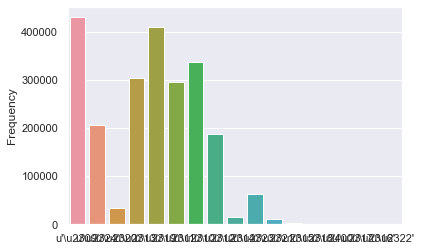

In [169]:
sns.set()

sns.barplot(y='Frequency',x=indi,data=df1.iloc[0:750,:])


In [81]:
# x = np.float32(ind)
fpath =  os.path.join(os.getcwd(), 'hindiFonts', 'NotoSans-Regular.ttf')

font = ft2font.FT2Font(fpath)
fprop = fm.FontProperties(fname=fpath)

ttfFontProp = ttfFontProperty(font)

fontsize=18


x=ind
y = np.float32(df1['Frequency'])
colors = np.random.rand(len(df1))
plt.scatter(x, y, c=colors, alpha=0.5)

plt.xlabel("Vowels")
plt.ylabel("Frequency")
for xLabel in plt.xticks():
    xLabel.set_fontproperties(fontprop)
    xLabel.set_fontsize(fontsize)

for yLabel in plt.yticks():
    yLabel.set_fontproperties(fontprop)
    yLabel.set_fontsize(fontsize)
plt.show()
# csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':fname}

# plt.title('title',**csfont)
plt.xlabel(ind, **hfont)
plt.show()

AttributeError: 'list' object has no attribute 'set_fontproperties'